In [1]:
# !pip install -r requirements.txt

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Coleta inicial dos dados de ETH

In [3]:
eth_ticker = 'ETH-USD'

eth_data = yf.download(eth_ticker, start="2020-01-01", end="2024-09-18", interval="1d")

eth_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [4]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1722 entries, 2020-01-01 to 2024-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1722 non-null   float64
 1   High       1722 non-null   float64
 2   Low        1722 non-null   float64
 3   Close      1722 non-null   float64
 4   Adj Close  1722 non-null   float64
 5   Volume     1722 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 94.2 KB


In [5]:
eth_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1.722000e+03
mean,1917.357365,1968.731459,1860.827558,1918.421362,1918.421362,1.605736e+10
std,1145.287532,1176.109601,1109.269558,1144.108927,1144.108927,9.907271e+09
min,110.406784,116.021622,95.184303,110.605873,110.605873,2.081626e+09
25%,1216.910492,1244.657471,1186.058563,1217.159607,1217.159607,9.279625e+09
50%,1832.120056,1862.135925,1796.551636,1832.595581,1832.595581,1.415954e+10
75%,2772.247009,2855.230164,2674.609558,2772.919189,2772.919189,2.000843e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


# Pré-processamento

## Análise de dados faltantes

In [6]:
eth_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Plotando dados de fechamento

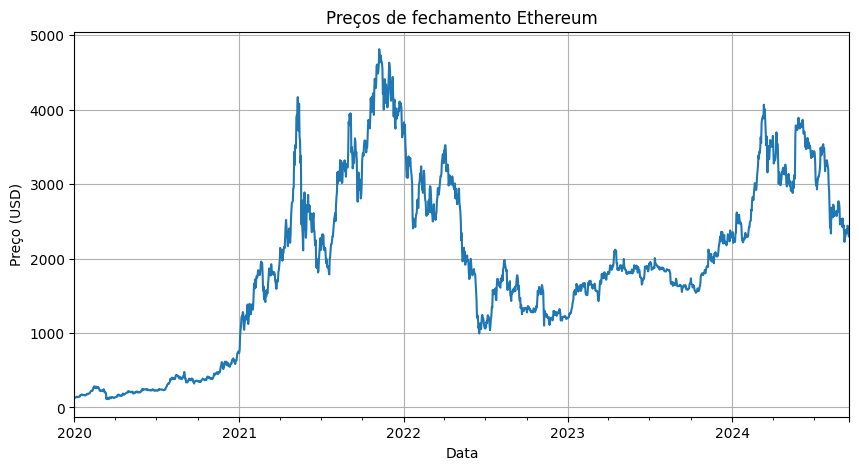

In [7]:
eth_data['Close'].plot(figsize=(10,5))
plt.title('Preços de fechamento Ethereum')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.grid()
plt.show()

# Preço de fechamento com médias móveis

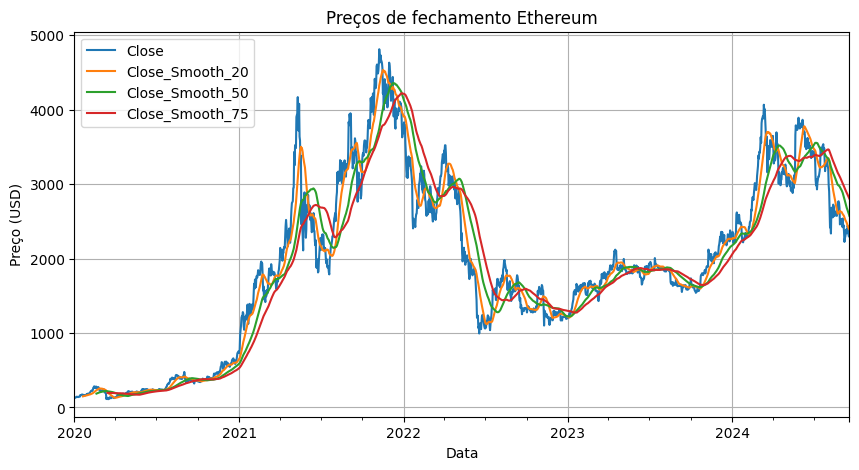

In [8]:
eth_data['Close_Smooth_20'] = eth_data['Close'].rolling(window=20).mean()
eth_data['Close_Smooth_50'] = eth_data['Close'].rolling(window=50).mean()
eth_data['Close_Smooth_75'] = eth_data['Close'].rolling(window=75).mean()

eth_data[['Close', 'Close_Smooth_20', 'Close_Smooth_50', 'Close_Smooth_75']].plot(figsize=(10,5))
plt.title('Preços de fechamento Ethereum')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.grid()
plt.show()

# Volume de negociação

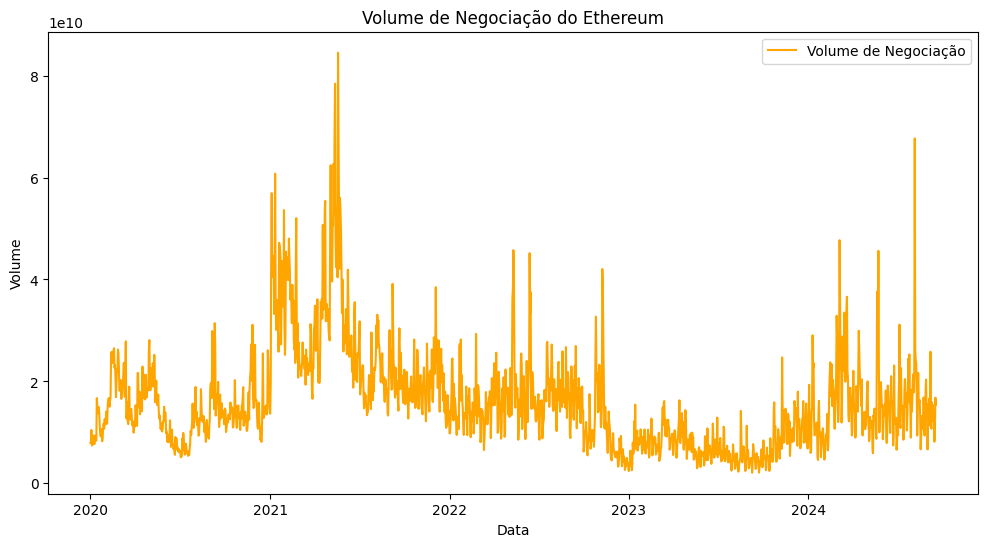

In [9]:
plt.figure(figsize=(12,6))
plt.plot(eth_data['Volume'], color='orange', label='Volume de Negociação')
plt.title('Volume de Negociação do Ethereum')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.show()

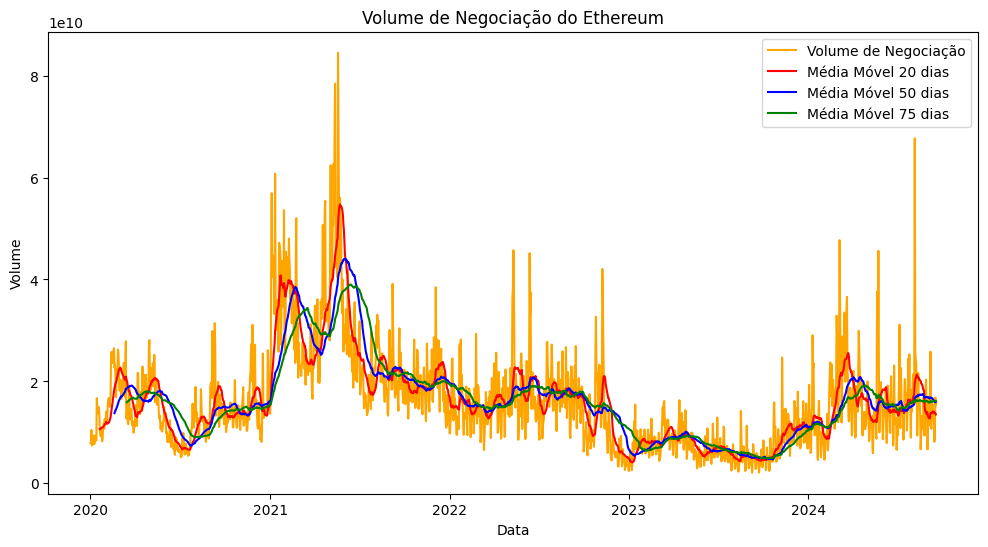

In [10]:
## Volume de negociação com médias móveis
eth_data['Volume_Smooth_20'] = eth_data['Volume'].rolling(window=20).mean()
eth_data['Volume_Smooth_50'] = eth_data['Volume'].rolling(window=50).mean()
eth_data['Volume_Smooth_75'] = eth_data['Volume'].rolling(window=75).mean()

plt.figure(figsize=(12,6))
plt.plot(eth_data['Volume'], color='orange', label='Volume de Negociação')
plt.plot(eth_data['Volume_Smooth_20'], color='red', label='Média Móvel 20 dias')
plt.plot(eth_data['Volume_Smooth_50'], color='blue', label='Média Móvel 50 dias')
plt.plot(eth_data['Volume_Smooth_75'], color='green', label='Média Móvel 75 dias')
plt.title('Volume de Negociação do Ethereum')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Análise de correlação

In [11]:
correlation = eth_data[['Close', 'Volume']].corr()
print(correlation)

           Close    Volume
Close   1.000000  0.215006
Volume  0.215006  1.000000


# RSI

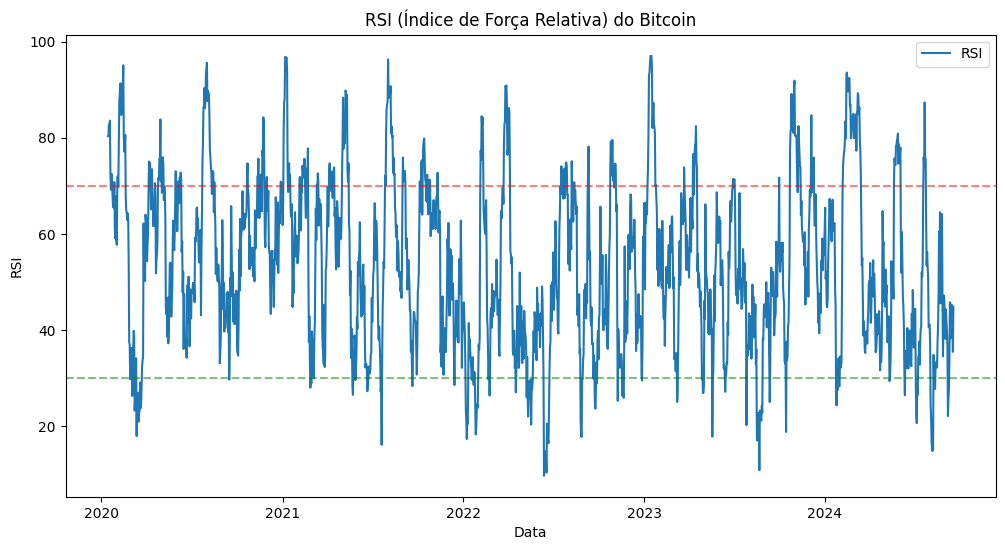

In [12]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

eth_data['RSI'] = compute_rsi(eth_data['Close'])

plt.figure(figsize=(12,6))
plt.plot(eth_data['RSI'], label='RSI')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Limite de sobrecompra
plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Limite de sobrevenda
plt.title('RSI (Índice de Força Relativa) do Bitcoin')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()
plt.show()
